In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
#from keras.datasets import CIFAR100
import numpy as np
import tensorflow_datasets as tfds

C:\Users\PlayerPC\Miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#(x_train,y_train), (x_test,y_test)=CIFAR100.load_data()
'''print(tfds.load('cifar100', split='train', shuffle_files=True,as_supervised=True))

builder = tfds.builder('cifar100')
info = builder.info
print(info)


x_train, y_train = tfds.as_numpy(tfds.load('cifar100', split='train', shuffle_files=True,as_supervised=True))'''
#x_test, y_test = tfds.as_numpy(tfds.load('cifar100', split='test', shuffle_files=True))
#print(ds)

#from eCIFAR100 import extract_training_samples
#x_train, y_train = extract_training_samples('digits')
#x_train, y_train = extract_training_samples('byclass')
#x_train, y_train = extract_training_samples('letters')

num_classes=10
input_shape = (32, 32, 3)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)


Train X=(50000, 32, 32, 3, 1), y=(50000, 10)
Train X=(50000, 32, 32, 3, 1), y=(50000, 10)
Test X=(10000, 32, 32, 3, 1), y=(10000, 10)
(32, 32, 3, 1)


In [3]:
from keras.layers import Convolution2D, Input

def define_skip_model():
    inputs = keras.Input(shape=input_shape, name="img")
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv2D(32, 3, activation="relu")(x)
    x = layers.Conv2D(64, 3, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.2)(x)
    block_1_output = layers.MaxPooling2D(3)(x)
    #block_1_output = layers.BatchNormalization()(block_1_output)
    
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.2)(x)
    block_2_output = layers.concatenate([x, block_1_output])
    #block_2_output = layers.BatchNormalization()(block_2_output)

    x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.2)(x)
    block_3_output = layers.concatenate([x, block_2_output])
    #block_3_output = layers.BatchNormalization()(block_3_output)
    
    '''x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_3_output)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    block_4_output = layers.concatenate([x, block_3_output])
    
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_4_output)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    block_5_output = layers.concatenate([x, block_4_output])

    x = layers.Conv2D(64, 3, activation="relu")(block_5_output)'''
    x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    #x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.9)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs, name="toy_resnet")
    return model
model=define_skip_model()

In [9]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(lr=0.003),
    metrics=['accuracy']
)

In [5]:
model.fit(x_train,y_train,batch_size=500,epochs=10,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/10
100/100 [==============================] - 16s 111ms/step - loss: 2.3384 - accuracy: 0.1119 - val_loss: 2.2705 - val_accuracy: 0.1352
Epoch 2/10
100/100 [==============================] - 13s 132ms/step - loss: 2.1934 - accuracy: 0.1561 - val_loss: 1.9778 - val_accuracy: 0.2447
Epoch 3/10
100/100 [==============================] - 13s 131ms/step - loss: 2.0835 - accuracy: 0.1904 - val_loss: 1.9189 - val_accuracy: 0.2618
Epoch 4/10
100/100 [==============================] - 13s 130ms/step - loss: 2.0143 - accuracy: 0.2127 - val_loss: 1.8791 - val_accuracy: 0.2838
Epoch 5/10
100/100 [==============================] - 13s 130ms/step - loss: 1.9487 - accuracy: 0.2314 - val_loss: 1.7637 - val_accuracy: 0.3501
Epoch 6/10
100/100 [==============================] - 13s 130ms/step - loss: 1.8875 - accuracy: 0.2484 - val_loss: 1.7049 - val_accuracy: 0.3449
Epoch 7/10
100/100 [==============================] - 13s 130ms/step - loss: 1.8452 - accuracy: 0.2644 - val_loss: 1.8199 - val_ac

In [6]:
model.fit(x_train,y_train,batch_size=500,epochs=10,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/10
100/100 [==============================] - 13s 133ms/step - loss: 1.6915 - accuracy: 0.3404 - val_loss: 1.5274 - val_accuracy: 0.4526
Epoch 2/10
100/100 [==============================] - 13s 131ms/step - loss: 1.6228 - accuracy: 0.3726 - val_loss: 1.4415 - val_accuracy: 0.4767
Epoch 3/10
100/100 [==============================] - 13s 131ms/step - loss: 1.6164 - accuracy: 0.3807 - val_loss: 1.4886 - val_accuracy: 0.5057
Epoch 4/10
100/100 [==============================] - 13s 131ms/step - loss: 1.5627 - accuracy: 0.4054 - val_loss: 1.3466 - val_accuracy: 0.5591
Epoch 5/10
100/100 [==============================] - 13s 131ms/step - loss: 1.5230 - accuracy: 0.4171 - val_loss: 1.3615 - val_accuracy: 0.5455
Epoch 6/10
100/100 [==============================] - 13s 130ms/step - loss: 1.4997 - accuracy: 0.4307 - val_loss: 1.3053 - val_accuracy: 0.5541
Epoch 7/10
100/100 [==============================] - 13s 130ms/step - loss: 1.4691 - accuracy: 0.4437 - val_loss: 1.2532 - val_ac

In [7]:
model.fit(x_train,y_train,batch_size=500,epochs=10,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/10
100/100 [==============================] - 13s 132ms/step - loss: 1.4019 - accuracy: 0.4752 - val_loss: 1.7098 - val_accuracy: 0.5814
Epoch 2/10
100/100 [==============================] - 13s 130ms/step - loss: 1.3935 - accuracy: 0.4789 - val_loss: 1.2814 - val_accuracy: 0.5994
Epoch 3/10
100/100 [==============================] - 13s 130ms/step - loss: 1.3613 - accuracy: 0.4877 - val_loss: 1.1951 - val_accuracy: 0.6052
Epoch 4/10
100/100 [==============================] - 13s 130ms/step - loss: 1.3430 - accuracy: 0.5020 - val_loss: 1.2086 - val_accuracy: 0.5964
Epoch 5/10
100/100 [==============================] - 13s 130ms/step - loss: 1.3391 - accuracy: 0.5050 - val_loss: 1.1740 - val_accuracy: 0.6245
Epoch 6/10
100/100 [==============================] - 13s 130ms/step - loss: 1.2910 - accuracy: 0.5226 - val_loss: 1.1663 - val_accuracy: 0.6291
Epoch 7/10
100/100 [==============================] - 13s 130ms/step - loss: 1.2885 - accuracy: 0.5219 - val_loss: 1.9190 - val_ac

In [8]:
model.fit(x_train,y_train,batch_size=500,epochs=30,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/30
100/100 [==============================] - 13s 131ms/step - loss: 1.2418 - accuracy: 0.5412 - val_loss: 1.2002 - val_accuracy: 0.6344
Epoch 2/30
100/100 [==============================] - 13s 130ms/step - loss: 1.2267 - accuracy: 0.5448 - val_loss: 1.2706 - val_accuracy: 0.6291
Epoch 3/30
100/100 [==============================] - 13s 130ms/step - loss: 1.2208 - accuracy: 0.5461 - val_loss: 1.2340 - val_accuracy: 0.6421
Epoch 4/30
100/100 [==============================] - 13s 130ms/step - loss: 1.2277 - accuracy: 0.5491 - val_loss: 1.2775 - val_accuracy: 0.5723
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 1.2157 - accuracy: 0.5529 - val_loss: 1.1758 - val_accuracy: 0.6556
Epoch 6/30
100/100 [==============================] - 13s 129ms/step - loss: 1.1813 - accuracy: 0.5614 - val_loss: 1.0665 - val_accuracy: 0.6508
Epoch 7/30
100/100 [==============================] - 13s 129ms/step - loss: 1.1895 - accuracy: 0.5603 - val_loss: 1.1378 - val_ac

In [10]:
model.fit(x_train,y_train,batch_size=500,epochs=30,shuffle=True,validation_data=(x_test,y_test))

Epoch 1/30
100/100 [==============================] - 14s 134ms/step - loss: 0.9636 - accuracy: 0.6409 - val_loss: 1.3020 - val_accuracy: 0.7101
Epoch 2/30
100/100 [==============================] - 13s 130ms/step - loss: 0.9098 - accuracy: 0.6588 - val_loss: 1.2423 - val_accuracy: 0.7115
Epoch 3/30
100/100 [==============================] - 13s 131ms/step - loss: 0.8884 - accuracy: 0.6660 - val_loss: 1.2387 - val_accuracy: 0.7047
Epoch 4/30
100/100 [==============================] - 13s 130ms/step - loss: 0.8768 - accuracy: 0.6702 - val_loss: 1.4408 - val_accuracy: 0.7047
Epoch 5/30
100/100 [==============================] - 13s 130ms/step - loss: 0.8684 - accuracy: 0.6741 - val_loss: 1.4316 - val_accuracy: 0.7099
Epoch 6/30
100/100 [==============================] - 13s 131ms/step - loss: 0.8652 - accuracy: 0.6754 - val_loss: 1.5368 - val_accuracy: 0.7150
Epoch 7/30
100/100 [==============================] - 13s 134ms/step - loss: 0.8465 - accuracy: 0.6825 - val_loss: 1.4523 - val_ac

In [12]:
model.save_weights("accuracy0.71.h5")

313/313 - 1s - loss: 0.0398 - accuracy: 0.9875 - 1s/epoch - 3ms/step
[0.039796166121959686, 0.987500011920929]
8440
(28, 28, 3)
(28, 28, 1)
1/1 [==============================] - 0s 24ms/step
9


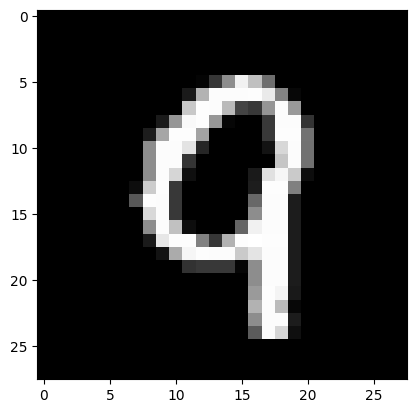

In [12]:
results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
print(str(results))
value=np.random.randint(0,10000)
print(value)
for id in range(len(y_train)):
    #print(labels[id])
    #break
    #22 - M big
    if(y_train.argmax()==7):
        value=id
        break
        


#print(x_train[value].shape)

single=x_train[value]
image=np.zeros((28,28,3))
print(image.shape)

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
        for c in range(0,image.shape[2]):
            image[y,x,c]=single[y][x]



print(single.shape)
#print(single)

singleReady=np.zeros((1,28,28))

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
            singleReady[0][y][x]=single[y][x]

print(model.predict(singleReady,batch_size=1).argmax())

plt.imshow(image)
plt.show()

In [13]:
model.save('saved_model_CNN/CIFAR100_byclass_done.h5')

In [14]:
#results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
#print(str(results))
#value=np.random.randint(0,10000)

id=22
for v in y_train:
    if(v.argmax()==id):
        print(id)
        ShowImage(v)
        break
        #id+=1
currentIteration=0
'''for v in y_train:
    if(v==id):
        print(id,v)
        ShowImage(v)
        currentIteration+=1
        id+=1    
    if(currentIteration==10):
        break'''


def ShowImage(value:int):
    print(x_train[value].shape)

    single=x_train[value]
    image=np.zeros((28,28,3))
    print(image.shape)

    for y in range(0,image.shape[0]):
        for x in range(0,image.shape[1]):
            for c in range(0,image.shape[2]):
                image[y,x,c]=single[y*28+x]



    #print(single.shape)
    #print(single)

    #singleReady=np.zeros((1,28*28))

    #for y in range(0,image.shape[0]):
    #    for x in range(0,image.shape[1]):
    #            singleReady[0][y*28+x]=single[y*28+x]

    #print(model.predict(singleReady,batch_size=1).argmax())

    plt.imshow(image)
    plt.show()

In [17]:
from PIL import Image
IMG = np.asarray(Image.open('E:/JupyterLab/Tensorflow_FKI_fall_2022/2022.10.07/Segmented/9.png'))

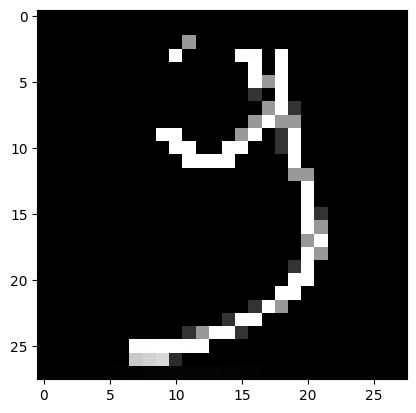

(28, 28, 3)
(1, 28, 28)


In [30]:
plt.imshow(IMG)
plt.show()
print(IMG.shape)

IMG_2=np.zeros((1,28,28),dtype="float32")

for x in range(28):
    for y in range(28):
        IMG_2[0][x][y]=IMG[x][y][0]/255.
print(IMG_2.shape)

In [32]:
print(model.predict(IMG_2,batch_size=1).argmax())

1/1 [==============================] - 0s 26ms/step
3
